█████ Q2R MODEL █████

▄▄▄ FUNCTIONS ▄▄▄

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
import math
import random 

In [60]:
def readData():
  l = []
  with open('input_Q2R.txt', 'r') as f:
    l = [ line.split('#')[0].split() for line in f ]
  n = int(l[0][0])
  jVal = int(l[1][0])
  nme = int(l[2][0])
  value = int(l[3][0])
  return n,jVal,nme,value 

In [61]:
def showSpin():
    plt.imshow(spin)
    plt.savefig('Q2R_1.png', dpi=300, bbox_inches='tight')
    plt.show()

In [62]:
def measE(spin):
  e = 0
  for i in range(n):
    for j in range(n):
          hi = i
          hj = j        
          hi1 = hi+1
          hi2 = hi-1
          hj1 = hj+1
          hj2 = hj-1
          if hi == 0: hi2 = n-1
          if hi == n-1: hi1 = 0
          if hj == 0: hj2 = n-1
          if hj == n-1: hj1 = 0
          e = e + -jVal*spin[hi1][hj]*(spin[hi1][hj]+spin[hi2][hj]+spin[hi][hj1]+spin[hi][hj2])
  return abs(e)

In [63]:
def measM(spin):
  m = 0
  for i in range(n):
    for j in range(n):
      m = m + spin[i][j]
  return m

In [64]:
def measUP(spin):
  m = 0
  for i in range(n):
    for j in range(n):
      if spin[i][j] == 1: m = m + 1
  return m

def startQ2R(value):
  spin = [[1 for _ in range(n)] for _ in range(n)]
  mag = int((n**2)*(1-(value/100)))
  if mag % 2 != 0: mag = mag + 1
  m = n**2
  while m != mag:
    hi = int(random.random()*(n))
    hj = int(random.random()*(n))   
    if spin[hi][hj] == 1: spin[hi][hj] = -1*spin[hi][hj]
    m = measUP(spin)
  return spin

In [65]:
def assignation():
  param = [[1 if (i+j) % 2 == 0 else -1 for j in range(n)] for i in range(n)]
  return param

def moveQ2R():    
  for i in range(n):
    for j in range(n):
      hi = i
      hj = j        
      hi1 = hi+1
      hi2 = hi-1
      hj1 = hj+1
      hj2 = hj-1
      if hi == 0: hi2 = n-1
      if hi == n-1: hi1 = 0
      if hj == 0: hj2 = n-1
      if hj == n-1: hj1 = 0
      if spin[hi1][hj]+spin[hi2][hj]+spin[hi][hj1]+spin[hi][hj2] == 0 and param[hi][hj] == 1:
        spin[hi][hj] = -1*spin[hi][hj]
      param[hi][hj] = -1*param[hi][hj]
  return spin, param

In [66]:
def Q2R(name_output):
    param = assignation()
    eList = []
    mList = []
    for value in range(50):
      spin = startQ2R(value)
      e = measE(spin)  
      m = measM(spin)
      for _ in range(nme):
          spin,param = moveQ2R()
          m = m + measM(spin)/nme
      eList.append(e)
      mList.append(abs(m))
      data = np.array([eList, mList])
      data = data.T
      with open(name_output, 'w+') as f:
        np.savetxt(f, data, fmt=['%f','%f'])

In [67]:
def motion_Q2R():
    for tt in range(1000):
      try:
        tt+=1
        spin, param = moveQ2R()
        plt.title(tt)
        plt.imshow(spin)
        plt.pause(0.0001)     
        display.clear_output(wait=True)
      except KeyboardInterrupt:
        plt.title(tt)
        plt.imshow(spin)
        plt.savefig('Q2R_2.png', dpi=300, bbox_inches='tight')
        plt.show()
        break

In [68]:
def readOutput(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y


def plotOutput():
    x8, y8 = readOutput('SALIDA.txt')

    data128 = []

    data128 = np.column_stack((x8,y8))



    x8,y8 = zip(*data128)

    plt.plot(x8, y8, label=str(n), linestyle='None')

    plt.xlabel('E')
    plt.ylabel('|M|')
    plt.title('|M| (E)')
    plt.legend()

    plt.scatter(x8,y8)
    z = np.polyfit(x8, y8, 7)
    p = np.poly1d(z)
    plt.plot(x8,p(x8),"r--")
    plt.savefig('Q2R_graph.png', dpi=300, bbox_inches='tight')
    plt.show()

▄▄▄ MAIN PROGRAM ▄▄▄

In [69]:
# 1.- READ DATA

n,jVal,nme,value = readData()

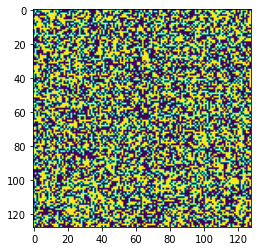

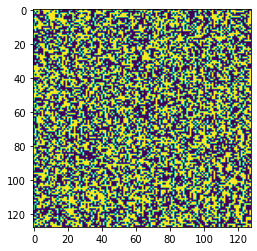

In [70]:
# 2.- CREATE AN INITIAL STATE

spin = startQ2R(value)

showSpin()

# Move it
param = assignation()
spin,param = moveQ2R()

showSpin()

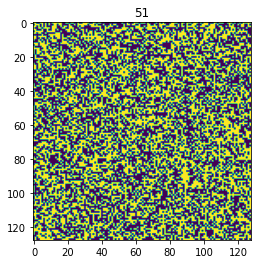

In [71]:
# 3.- HOW THE SYSTEM EVOLVES

spin = startQ2R(value)

motion_Q2R()

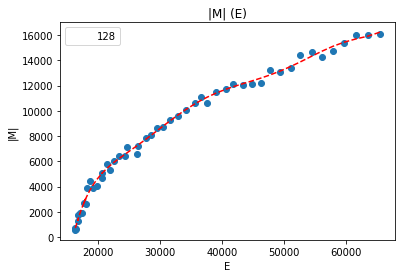

In [40]:
# 4.- CREATE GRAPHS

Q2R("SALIDA.txt")

plotOutput()